**I21-0503**
**Muhammd Zian Ahmed**
**CS-D**
# Library and File Import

In [1]:
from nltk.tokenize import word_tokenize
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
import pandas as pd
import numpy as np
import tabulate
import string
import nltk

# Download the NLTK packages for tokenization
#nltk.download('punkt_tab')
#nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('Dataset/factuality_annotations_xsum_summaries.csv')
df.head()
print(len(df))

5597


# Plotting Functions
- **Cost w.r.t HyperParameters**
- **Confusion Matrix**
- **Metrics Graph**
- **K-Cross Accuracy**

In [2]:
def plot_costs(hyperparam_costs):
    sns.set(style="whitegrid") 
    
    plot_data = []
    
    for lr, costs in hyperparam_costs.items():
        for i, cost in enumerate(costs):
            plot_data.append([lr, i, cost])
    
    df = pd.DataFrame(plot_data, columns=['Learning Rate', 'Iteration', 'Cost'])
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x="Iteration", y="Cost", hue="Learning Rate", palette="coolwarm", linewidth=2.5)
    plt.title('Cost vs Iterations for Different Learning Rates', fontsize=16)
    plt.xlabel('Iterations', fontsize=12)
    plt.ylabel('Cost', fontsize=12)
    plt.legend(title="Learning Rates", title_fontsize='13', loc='upper right', fontsize='11')
    plt.show()

def confusion_matrix(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0 
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] == 1:
            tp += 1
        if y_true[i] == y_pred[i] == 0:
            tn += 1
        if y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        if y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    cm = np.array([[tn, fp], [fn, tp]])
    return cm

def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues",xticklabels=labels,yticklabels=labels, cbar=False)
    
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=12)
    plt.ylabel('True Labels', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    return cm

import numpy as np
import matplotlib.pyplot as plt

def plot_metrics(cm):
    accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) != 0 else 0
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1_score]
    
    plt.figure(figsize=(8, 5))
    plt.barh(metrics, values, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral'])
    
    plt.xlabel('Metric Value', fontsize=12)
    plt.title('Classification Metrics', fontsize=16)
    plt.xlim(0, 1)
    
    for index, value in enumerate(values):
        plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_kfold(accuracies, avg_accuracy,std_dev, k):
    sns.set(style="whitegrid")  
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, k + 1), accuracies, marker='o', color='b', label="Accuracy per Fold", linewidth=2)
    plt.axhline(y=avg_accuracy, color='r', linestyle='--', label=f"Average Accuracy ({avg_accuracy:.4f})", linewidth=2)
    plt.title(f"{k}-Fold Cross-Validation Accuracy", fontsize=16)
    plt.xlabel("Fold", fontsize=14)
    plt.ylabel("Accuracy", fontsize=14)
    plt.xticks(range(1, k + 1), fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, title=f"Std Dev: {std_dev:.4f}", title_fontsize=12)
    plt.tight_layout()
    plt.show()

def tabulate_data(X, Y, y_hat):
    data = []
    for i in range(len(Y)):
        if Y[i] != y_hat[i]:
            row = [
                colored('Hallucinated', 'green') if Y[i] == 1 else colored('Not Hallucinated', 'red'),  
                colored('Hallucinated', 'green') if y_hat[i] == 1 else colored('Not Hallucinated', 'red'),  
                colored(X[i], 'cyan')  
            ]
            data.append(row)
    
    print(tabulate.tabulate(
        data, 
        headers=[colored('True Label', 'blue'), 
                 colored('Predicted Label', 'blue'),
                 colored('Original Sentence', 'blue')], 
        tablefmt='fancy_grid', 
        stralign='left'
    ))

# Helping Functions
- **Sentence To Vector**
- **Sigmoid Function**
- **Logistic Cost Function**
- **Training Function**
- **Predicting Function**

In [3]:
def sentence_to_vector(sentence,length,id):
    words = word_tokenize(sentence)
    vector = np.zeros(length)
    for word in words:
        if word in id:
            vector[id[word]] += 1
    return vector


def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def cost(A, Y):
    m = Y.shape[0]
    return -np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))/m

def model(X, Y, learning_rate=0.01, epoch=1000):
    m, n = X.shape
    costs = []  
    W = np.random.rand(n)
    b = np.random.rand(1)
    
    for _ in range(epoch):
        Z = np.dot(X, W) + b
        A = sigmoid(Z)
        
        cost_value = cost(A, Y)
        costs.append(cost_value)
        
        dZ = A - Y  
        dW = np.dot(X.T, dZ) / m  
        db = np.sum(dZ) / m   
        
        W = W - learning_rate * dW
        b = b - learning_rate * db
  
    return W, b, costs

def predict(X, W, b):
    Z = np.dot(X, W) + b
    A = sigmoid(Z)
    return 0 if A < 0.5 else 1


def tune_hyperparameters(X, Y, learning_rates, epoch=500):
    best_cost = float('inf')
    best_W = None
    best_b = None
    best_lr = None
    hyperparam_costs = {}  

    for lr in learning_rates:
        W, b, costs = model(X, Y, learning_rate=lr, epoch=epoch)
        
        final_cost = costs[-1]
        hyperparam_costs[lr] = costs
        
        if final_cost < best_cost:
            best_cost = final_cost
            best_W = W
            best_b = b
            best_lr = lr

    
    return best_W, best_b, best_lr, hyperparam_costs

def k_fold_cross_validation(X, Y, k=5, learning_rate=0.01, epoch=1000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    
    fold = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        W, b, costs = model(X_train, Y_train, learning_rate=learning_rate, epoch=epoch)
        
        y_hat = np.array([predict(x, W, b) for x in X_test])          
        accuracy = accuracy_score(Y_test, y_hat)
        accuracies.append(accuracy)
        
        fold += 1
    
    avg_accuracy = np.mean(accuracies)
    std_dev = np.std(accuracies)
    plot_kfold(accuracies, avg_accuracy,std_dev, k)


# Data Preprocessing
- **Lowercase**
- **Remove Punctuation**
- **Remove Digits**
- **Output labels to 0/1**

In [4]:
output = [ 1 if df['is_factual'][i]=='no' else 0 for i in range(len(df))]


input = []
pre_input = df['summary']
for s in pre_input:
    s = s.lower()
    s = s.translate(str.maketrans(string.punctuation, ' ' * len(string.punctuation)))
    s = s.translate(str.maketrans(string.digits, ' ' * len(string.digits)))
    input.append(s)

# Tokenization & Vocabulary
- **Generating Tokens From Summary**
- **Unique Words Library**
- **Assigning Unique IDs to vocabulary**

In [5]:
vocabulary = set()
for sentence in input:
    words = nltk.word_tokenize(sentence)
    vocabulary.update(words)
vocab = {v:i for i,v in enumerate(vocabulary)}

print("Length of Vocabulary: ", len(vocab))

Length of Vocabulary:  4131


# Processing Data For Model
- **Word to Vector**
- **Converting Input/Output to Numpy Arrays**
- **4/5 Data For Training**
- **1/5 For Testing**

In [6]:
X = np.array([sentence_to_vector(sentence,len(vocab),vocab) for sentence in input])
Y = np.array(output)
print("Input Vector Shape: ", X.shape)  
print("Output Vector Shape: ", Y.shape)

# Split the dataset into training and testing   
output_test = input[int((4/5)*len(input)):]
X_train = X[:int((4/5)*len(X))]
X_test = X[int((4/5)*len(X)):]
Y_train = Y[:int((4/5)*len(Y))]
Y_test = Y[int((4/5)*len(Y)):]
print("Train Examples: ", len(X_train))
print("Test Examples: ", len(X_test))

Input Vector Shape:  (5597, 4131)
Output Vector Shape:  (5597,)
Train Examples:  4477
Test Examples:  1120


# Hyperparamter Analysis
- **Beast Learning Rate = 0.1**
- **After Approximately 200 Epochs cost converges**

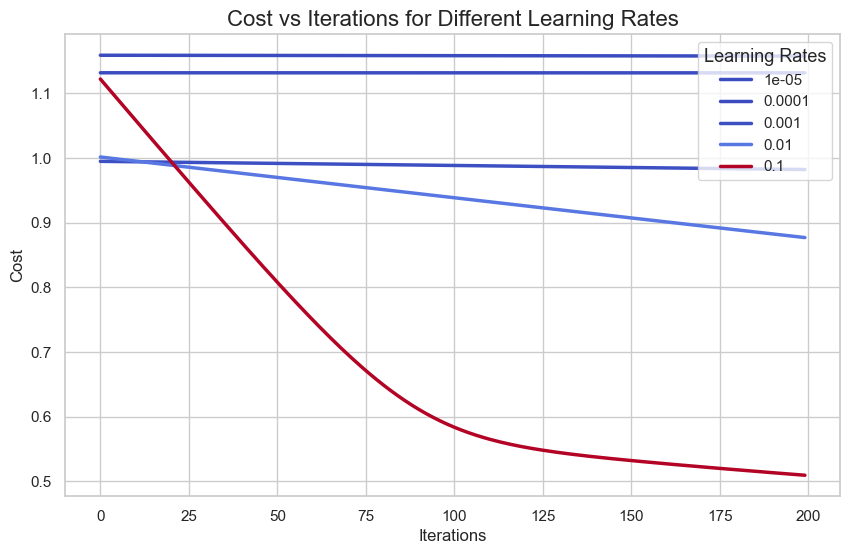

In [7]:
learning_rates = [10**-i for i in range(1, 6)]  
W, b, lr, hyperparam_costs = tune_hyperparameters(X_train, Y_train, learning_rates,200)
plot_costs(hyperparam_costs)

# Prediction on test set
- **Confusion Matrix**
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**


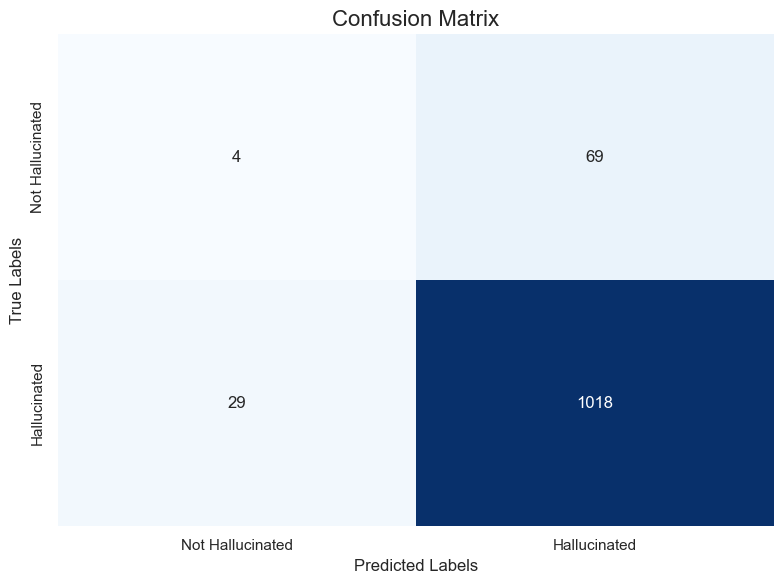

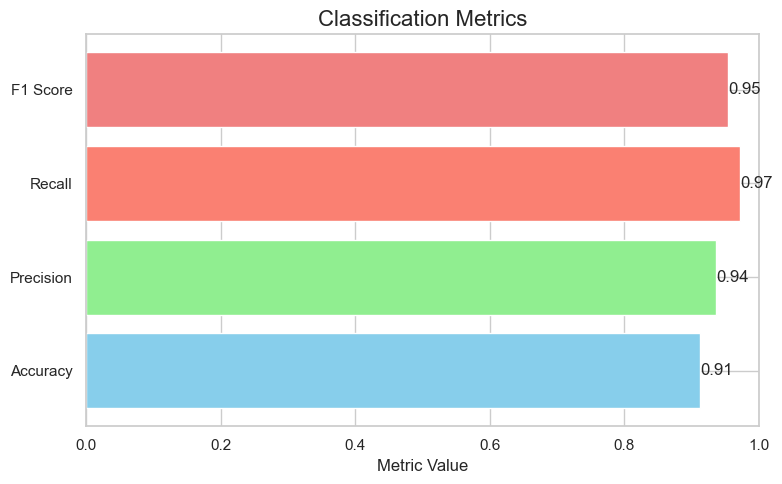

In [8]:
y_hat = [predict(X_test[i], W, b) for i in range(len(X_test))]
cm = plot_confusion_matrix(Y_test, y_hat, labels=['Not Hallucinated', 'Hallucinated'])
plot_metrics(cm)

# K-Cross Validitation
- **Average Accuracy: 0.8742**
- **Standard Deviation: 0.0032**

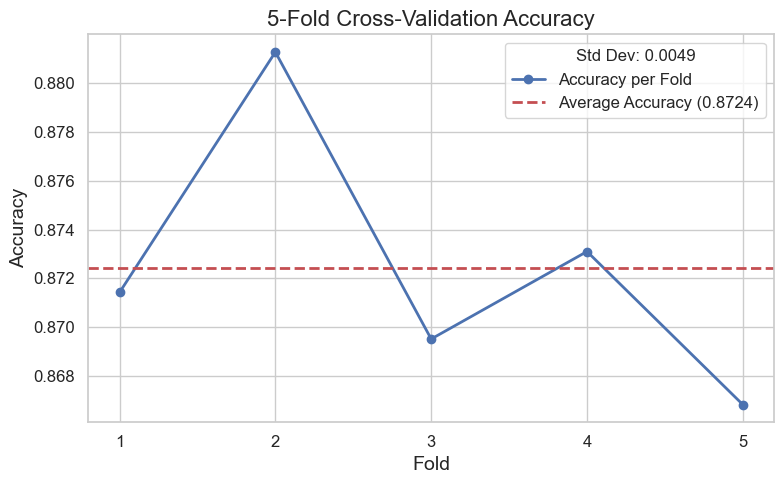

In [9]:
k_fold_cross_validation(X, Y, k=5, learning_rate=lr, epoch=200)

# Predictions Analysis
#### **Identified Issuess**
1. **Class Imbalance**: More Positive(Hallucinated) Samples
2. **Sentences Repeated in Dataset**: Model confuses it with Hallucinated
3. **Lack Of Context**: Very short Sentences

### **Proposed Solutions** 
1. **Class Imbalance**: Apply class weighting or data augmentation to balance the dataset.
2. **Repeated Sentences**: Preprocess the dataset for deduplication and use sentence embeddings.
3. **Lack of Context**: Use context windowing or transformer-based models to capture more information.






In [10]:
tabulate_data(output_test,Y_test,y_hat)

╒══════════════════╤═══════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ True Label       │ Predicted Label   │ Original Sentence                                                                                                                                               │
╞══════════════════╪═══════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Hallucinated     │ Not Hallucinated  │ a man has died in a three vehicle crash in the angus area off the coast of mayo in the highlands                                                                │
├──────────────────┼───────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────